In [24]:
#import basic libraries

import csv
import sys
import os
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import axes3d
#%matplotlib tk
import operator
sys.path.append("../Python_code") # go to parent dir
from reddit import *
from analytics_combined import *
import pandas as pd

In [25]:
import sys
sys.path.append("../Python_code") # go to parent dir
from reddit import *
from canvas_vis import *
from project_data_analysis import *
from generate_proj_to_remove import *

In [3]:
#Run this before anything else!

input_file_proj = "../data_2022/sorted_tile_placements_proj.csv"
#input_file_proj_den_freq = "../data/sorted_tile_placements_proj_den_freq.csv"
#input_file_proj_den_users = "../data/sorted_tile_placements_proj_den_users.csv"

projects_to_remove = {}

def generate_figures_time(hour_marks, picID):
    begin_time = 1490918688000
    
    if picID is None:
            data = extract_canvas_color('../data/sorted_tile_placements_proj.csv', 0, 1000, 0, 1000,\
                            begin_time+1000*60*60*hour_marks)
    else:
            data = extract_project_color('../data/sorted_tile_placements_proj.csv', picID, 
                            begin_time+1000*60*60*hour_marks)
    
    for t in range(len(hour_marks)):
        tmp_file_name = "../plots/tmp_fig_"+str(t)+".png"
        draw_canvas(canvas_color_code_rgb(data[t]), tmp_file_name);

def generate_figures_time_22(hour_marks, picID, begin_time):
    
    if picID is None:
            data = extract_canvas_color_22(input_file_proj, 0, 2000, 0, 2000,\
                            begin_time+60*60*hour_marks)
    else:
            data = extract_project_color_22(input_file_proj, picID, 
                            begin_time+60*60*hour_marks)
    
    for t in range(len(hour_marks)):
        tmp_file_name = "../plots/tmp_fig_"+str(t)+".png"
        draw_canvas(canvas_color_code_rgb_22(data[t]), tmp_file_name);

In [31]:
from canvas_vis import *
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

%matplotlib inline
def plot_updates_per_time_with_figure(pixel, pixel_color, other, proj, hour_marks, up_line, zoom, output_file_name, xtick):
    plt.clf()
    ax = plt.subplot(111)
    total = pixel+pixel_color+other
    ax.plot(np.arange(pixel.shape[0]), 100*pixel, color="#005d5d", linewidth=4, label="Final", linestyle='-')
    ax.plot(np.arange(pixel_color.shape[0]), 100*pixel_color, color="#002d9c", linewidth=3, label="Match", linestyle='--')
    ax.plot(np.arange(other.shape[0]), 100*other, color="#fa4d56", linewidth=2, label="Adv", linestyle=':')
       
    for t in range(len(hour_marks)):
        tmp_file_name = "../plots/tmp_fig_23_"+str(t)+".png"
        arr_img = plt.imread(tmp_file_name, format='png')
        
        imagebox = OffsetImage(arr_img, zoom=zoom)
        imagebox.image.axes = ax
    
        ab = AnnotationBbox(imagebox, (hour_marks[t], up_line),
                        None,
                        xycoords='data',
                        pad=0.1)

        ax.add_artist(ab)
    
    ax.set_ylabel('update (%)', fontsize=15)
    ax.set_xlabel('time (hours)', fontsize=15)
    ax.tick_params(labelsize=18)
    ax.set_xlim(0, 140)
    ax.set_xticks(xtick)
    ax.set_ylim(0, 1.4)
    ax.set_yticks(np.arange(0,1.4, .4))
    ax.tick_params(labelsize=10)

    ax.vlines(np.array(hour_marks),ymin=0,ymax=up_line,color='k', linestyle='--')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=True, ncol=3, fontsize=12)
    ax.ticklabel_format(useOffset=False, style='plain')
    #ax.set_aspect(aspect=.2)
    
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

In [27]:
min_time_22 = 1648835050
max_time_22 = 1649126650

In [6]:
#Computing updates per project
updates_per_proj, total_updates = updates_per_project(input_file_proj, projects_to_remove)

#computing the updates in three different category: agree,disagree,final
tile_updates, total_tile_updates = update_category_per_project_22(min_time_22, max_time_22, input_file_proj)

print("total updates:", total_updates)

total updates: 293271894


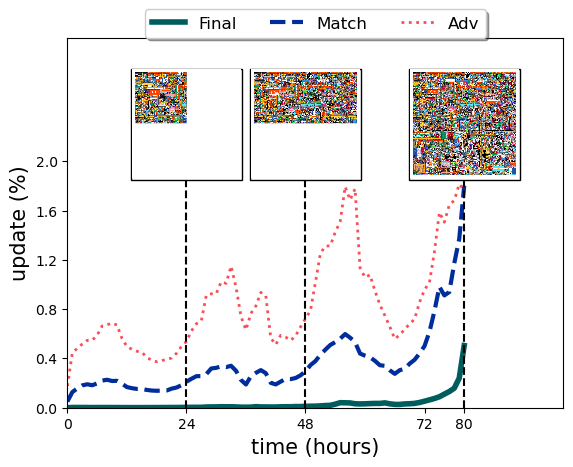

In [20]:
# zoom =.04 decides how large the figures should be
xtick = np.arange(0, 90, 24)
xtick = np.append(xtick, 80)
# plot_updates_per_time_with_figure(pixel, pixel_color, other, proj, hour_marks, up_line, zoom, output_file_name):
plot_updates_per_time_with_figure(total_tile_updates["final_updates"], total_tile_updates["agreeing_updates"],
    total_tile_updates["disagreeing_updates"], None, np.array([24, 48, 80]), 2.3, .05,
    "../plots/plot_updates_time_total_fig_22.svg",xtick)

In [28]:
min_time_23 = 1689876026
max_time_23 = 1690326100
input_file_proj = '../data_2023/tile_placements_proj.csv'
#Computing updates per project
updates_per_proj, total_updates = updates_per_project('../data_2023/tile_placements_proj.csv', projects_to_remove)

#computing the updates in three different category: agree,disagree,final
tile_updates, total_tile_updates = update_category_per_project_22(min_time_23, max_time_23, input_file_proj)

print("total updates:", total_updates)

total updates: 570239516


In [22]:
def generate_figures_time_23(hour_marks, picID, begin_time):
    
    if picID is None:
            data = extract_canvas_color_22(input_file_proj, 0, 3000, 0, 2000,\
                            begin_time+60*60*hour_marks)
    else:
            data = extract_project_color_22(input_file_proj, picID, 
                            begin_time+60*60*hour_marks)
    print(data)
    for t in range(len(hour_marks)):
        tmp_file_name = "../plots/tmp_fig_"+str(t)+".png"
        draw_canvas(canvas_color_code_rgb_22(data[t]), tmp_file_name);

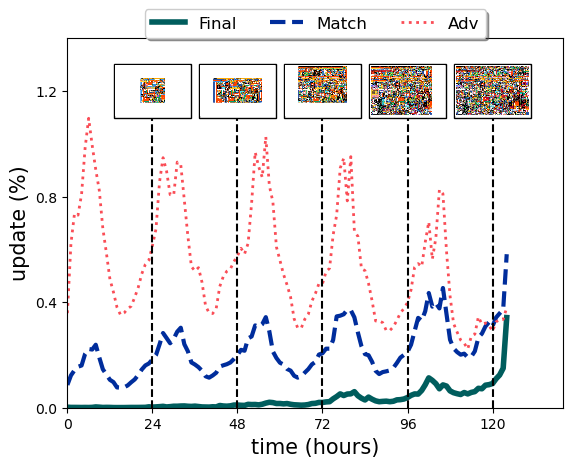

In [37]:
#zoom =.04 decides how large the figures should be
xtick = np.arange(0, 140, 24)
# plot_updates_per_time_with_figure(pixel, pixel_color, other, proj, hour_marks, up_line, zoom, output_file_name):
plot_updates_per_time_with_figure(total_tile_updates["final_updates"], total_tile_updates["agreeing_updates"],
    total_tile_updates["disagreeing_updates"], None, np.array([24, 48, 72, 96, 120]), 1.2, .026,
    "../plots/plot_updates_time_total_fig_23.svg",xtick)